In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
print(df.shape)
print(df.dtypes)

(6362620, 11)
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [13]:
print(df['isFraud'].value_counts(normalize=True))

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [14]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


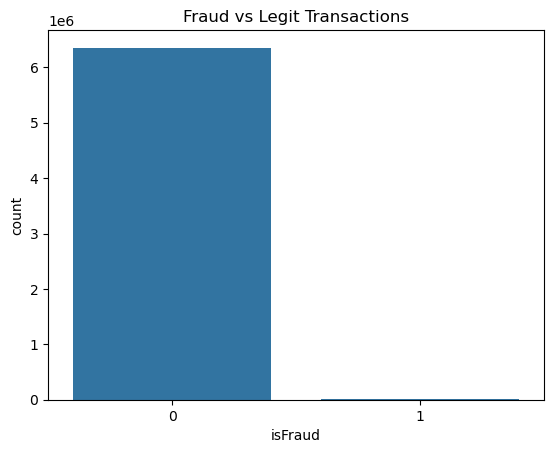

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Legit Transactions")
plt.show()
plt.savefig("../output/countplot.png", bbox_inches='tight', dpi=300)

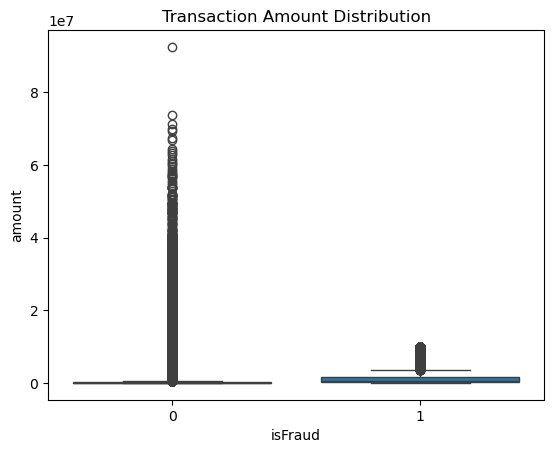

In [ ]:
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Transaction Amount Distribution")
plt.show()

In [3]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [4]:
df.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
balanceDiffOrig    0
balanceDiffDest    0
dtype: int64

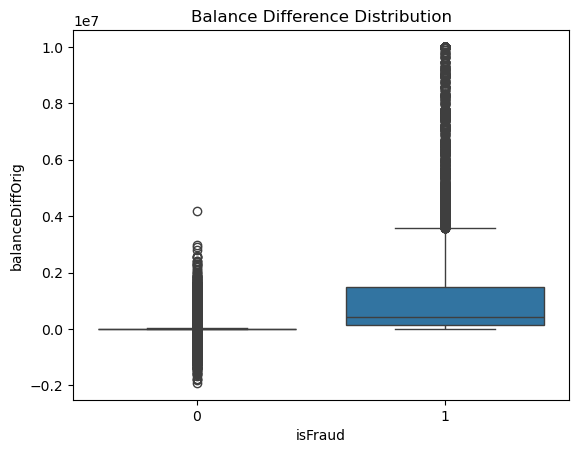

In [18]:
# boxplot balanceDiffOrig vs isFraud
sns.boxplot(data=df, x='isFraud', y='balanceDiffOrig')
plt.title("Balance Difference Distribution")
plt.show()

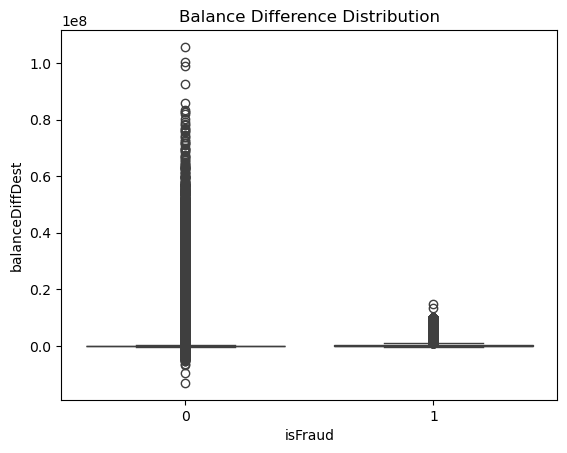

In [ ]:
# balanceDiffDest vs isFraud
sns.boxplot(data=df, x='isFraud', y='balanceDiffDest')
plt.title("Balance Difference Distribution")
plt.show()


In [4]:
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    df[col] = np.log1p(df[col])

/tmp/ipykernel_182344/2872012446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['balanceDiffOrig'])


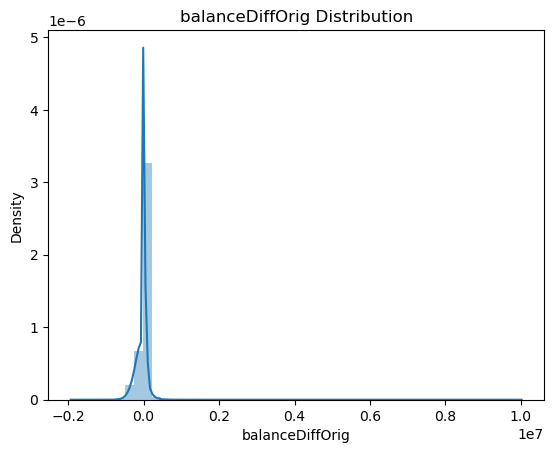

In [ ]:
# Amount distribution plot
sns.distplot(df['balanceDiffOrig'])
plt.title("balanceDiffOrig Distribution")
plt.show()

/tmp/ipykernel_182344/2518503707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])


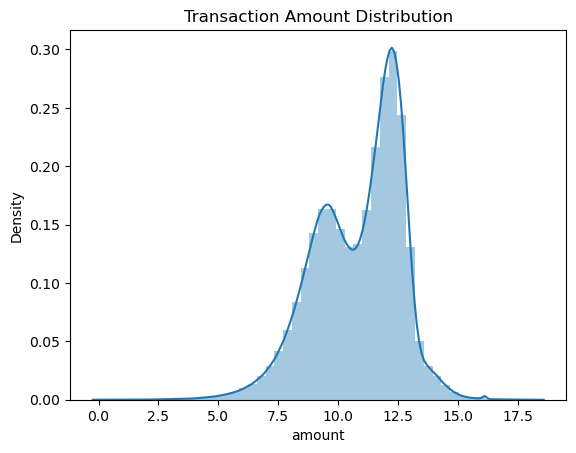

In [ ]:
# Amount distribution plot
sns.distplot(df['amount'])
plt.title("Transaction Amount Distribution")
plt.show()

/tmp/ipython-input-1970578621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceOrg'])


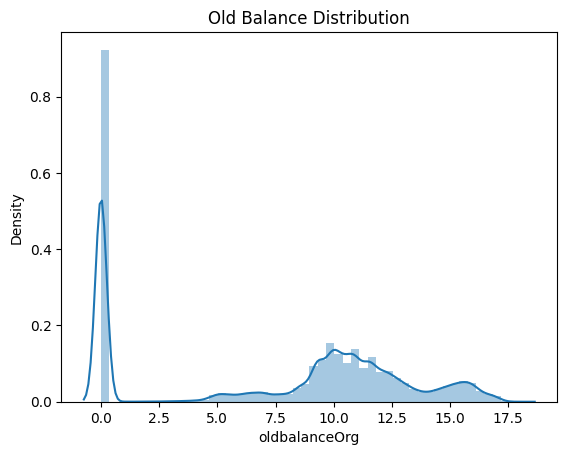

In [ ]:
# oldbalanceOrg Distribution plot
sns.distplot(df['oldbalanceOrg'])
plt.title("Old Balance Distribution")
plt.show()

/tmp/ipython-input-3613097655.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldbalanceDest'])


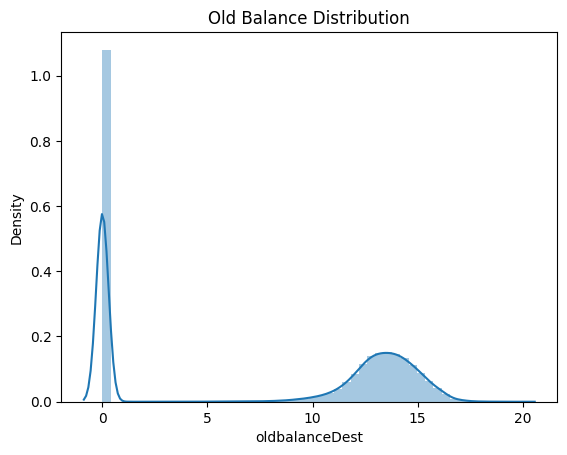

In [ ]:
# oldbalanceDest Distribution plot
sns.distplot(df['oldbalanceDest'])
plt.title("Old Balance Distribution")
plt.show()

/tmp/ipython-input-1709257881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newbalanceDest'])


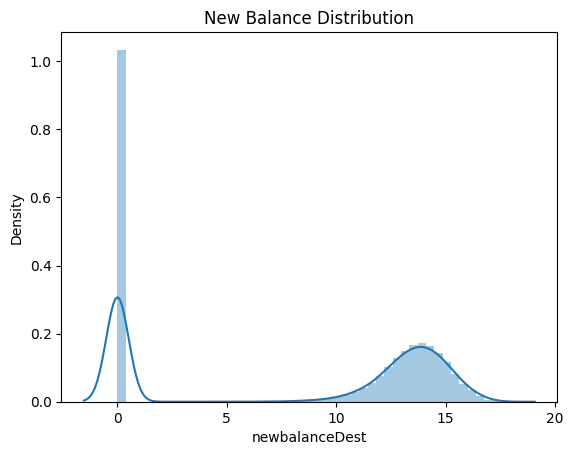

<Figure size 640x480 with 0 Axes>

In [ ]:
# newbalanceDest Distribution plot
sns.distplot(df['newbalanceDest'])
plt.title("New Balance Distribution")
plt.show()
plt.savefig("./output/dist.png", bbox_inches='tight', dpi=300)

/tmp/ipython-input-3510069572.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newbalanceOrig'])


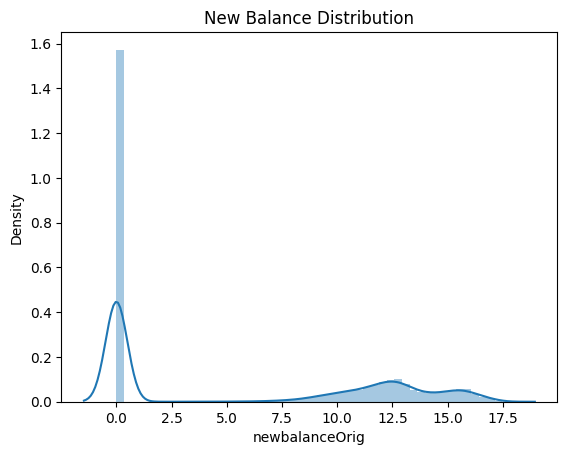

In [ ]:
# newbalanceOrg Distribution plot
sns.distplot(df['newbalanceOrig'])
plt.title("New Balance Distribution")
plt.show()

In [5]:
def extract_time_features(step: int, type: str):
  if type == "hour":
    return step % 24
  elif type == "day":
    return step // 24
  elif type == "weekend":
    return 1 if step // 24 > 4 else 0

In [6]:
df['hourOfDay'] = df['step'].apply(lambda x: extract_time_features(x, 'hour'))
df['dayOfMonth'] = df['step'].apply(lambda x: extract_time_features(x, 'day'))
df['isWeekend'] = df['step'].apply(lambda x: extract_time_features(x, 'weekend'))

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,hourOfDay,dayOfMonth,isWeekend
0,1,PAYMENT,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0,0,9839.64,0.0,1,0,0
1,1,PAYMENT,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0,0,1864.28,0.0,1,0,0
2,1,TRANSFER,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1,0,181.00,0.0,1,0,0
3,1,CASH_OUT,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1,0,181.00,-21182.0,1,0,0
4,1,PAYMENT,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0,0,11668.14,0.0,1,0,0


In [9]:
df.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
balanceDiffOrig    0
balanceDiffDest    0
hourOfDay          0
dayOfMonth         0
isWeekend          0
dtype: int64

In [8]:
df['origBalanceRatio'] = df['newbalanceOrig'] / (df['oldbalanceOrg'] + 1)
df['destBalanceRatio'] = df['newbalanceDest'] / (df['oldbalanceDest'] + 1)

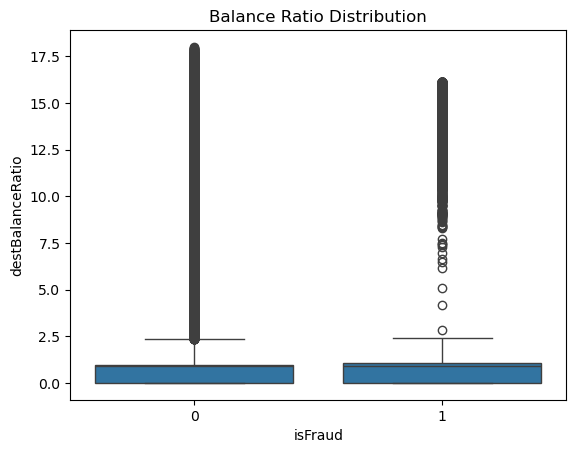

In [ ]:
# origBalanceRatio vs isFraud
sns.boxplot(data=df, x='isFraud', y='destBalanceRatio')
plt.title("Balance Ratio Distribution")
plt.show()

In [9]:

sender_stats = df.groupby('nameOrig')['amount'].agg(
    orig_txn_count='count',
    orig_total_amount='sum',
    orig_avg_amount='mean'
).reset_index()


receiver_stats = df.groupby('nameDest')['amount'].agg(
    dest_total_amount='sum',
    dest_avg_amount='mean'
).reset_index()

df = df.merge(sender_stats, on='nameOrig', how='left')
df = df.merge(receiver_stats, on='nameDest', how='left')


df = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])


In [10]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [11]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest,hourOfDay,...,destBalanceRatio,orig_txn_count,orig_total_amount,orig_avg_amount,dest_total_amount,dest_avg_amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9.194276,12.044359,11.984786,0.000000,0.0,0,9839.64,0.0,1,...,0.0,1,9.194276,9.194276,9.194276,9.194276,False,False,True,False
1,1,7.531166,9.964112,9.872292,0.000000,0.0,0,1864.28,0.0,1,...,0.0,1,7.531166,7.531166,7.531166,7.531166,False,False,True,False
2,1,5.204007,5.204007,0.000000,0.000000,0.0,1,181.00,0.0,1,...,0.0,1,5.204007,5.204007,511.186316,11.617871,False,False,False,True
3,1,5.204007,5.204007,0.000000,9.960954,0.0,1,181.00,-21182.0,1,...,0.0,1,5.204007,5.204007,486.428003,11.864098,True,False,False,False
4,1,9.364703,10.634773,10.305174,0.000000,0.0,0,11668.14,0.0,1,...,0.0,1,9.364703,9.364703,9.364703,9.364703,False,False,True,False


In [13]:
df = df.sort_values(by='step')

In [14]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest,hourOfDay,...,destBalanceRatio,orig_txn_count,orig_total_amount,orig_avg_amount,dest_total_amount,dest_avg_amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9.194276,12.044359,11.984786,0.0,0.0,0,9839.64,0.0,1,...,0.0,1,9.194276,9.194276,9.194276,9.194276,False,False,True,False
1801,1,8.548314,7.419932,0.000000,0.0,0.0,0,1667.92,0.0,1,...,0.0,1,8.548314,8.548314,8.548314,8.548314,False,False,True,False
1802,1,8.656510,0.000000,0.000000,0.0,0.0,0,0.00,0.0,1,...,0.0,1,8.656510,8.656510,8.656510,8.656510,False,False,True,False
1803,1,8.632014,8.556991,0.000000,0.0,0.0,0,5202.00,0.0,1,...,0.0,1,8.632014,8.632014,8.632014,8.632014,False,False,True,False
1804,1,8.758065,8.224700,0.000000,0.0,0.0,0,3731.00,0.0,1,...,0.0,1,8.758065,8.758065,8.758065,8.758065,False,False,True,False


In [13]:
df = df.drop(['step'], axis=1)

In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split
X_train, X_val = train_test_split(df, test_size=0.2, random_state=42)

# Contamination = fraction of frauds
outlier_fraction = X_train['isFraud'].mean()

# Separate labels
y_train = X_train['isFraud']
y_val = X_val['isFraud']

# Drop target from features
X_train = X_train.drop(['isFraud'], axis=1)
X_val = X_val.drop(['isFraud'], axis=1)

In [24]:
model = IsolationForest(
    n_estimators=200,
    contamination=outlier_fraction,
    random_state=42
)
model.fit(X_train, sample_weight=[5 if y == 1 else 1 for y in y_train])


IsolationForest(contamination=0.001297028582565044, n_estimators=200,
                random_state=42)

In [25]:
y_pred = model.predict(X_val)
y_pred = [1 if x == -1 else 0 for x in y_pred] 

In [26]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_pred))
print("AUPRC:", average_precision_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.99775957074287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270913
           1       0.13      0.14      0.14      1611

    accuracy                           1.00   1272524
   macro avg       0.57      0.57      0.57   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC: 0.5692560449230033
AUPRC: 0.019683600587165118
Confusion Matrix:
 [[1269448    1465]
 [   1386     225]]


: 

In [ ]:

cutoff = int(0.8 * len(df))

train_df = df.iloc[:cutoff]
test_df = df.iloc[cutoff:]

X_train = train_df.drop('isFraud', axis=1)
y_train = train_df['isFraud']

X_test = test_df.drop('isFraud', axis=1)
y_test = test_df['isFraud']


In [ ]:
# Use XGBOOST
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    scale_pos_weight=5,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268270
           1       0.97      0.85      0.91      4254

    accuracy                           1.00   1272524
   macro avg       0.99      0.92      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC Score: 0.9997822642313542


In [ ]:
# AUPRC
from sklearn.metrics import average_precision_score

print("AUPRC Score:", average_precision_score(y_test, y_pred_proba))

AUPRC Score: 0.9628683721161215


AUPRC (Average Precision): 0.9629


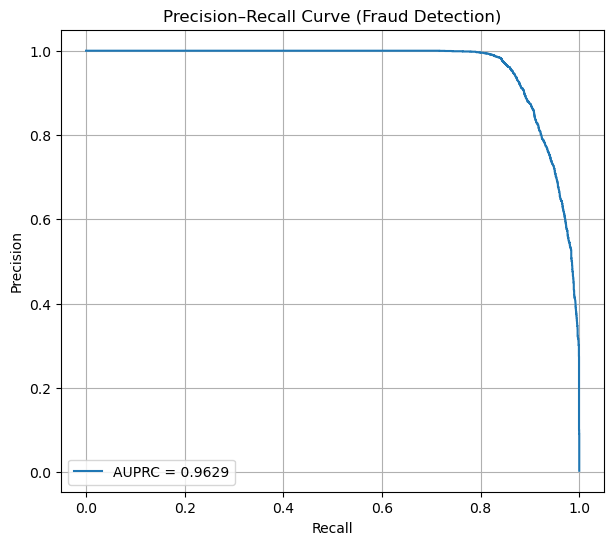

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


# 1️⃣ Compute precision, recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 2️⃣ Compute Area Under the Precision-Recall Curve (AUPRC)
auprc = average_precision_score(y_test, y_pred_proba)
print(f"AUPRC (Average Precision): {auprc:.4f}")

# 3️⃣ Plot the Precision–Recall curve
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f"AUPRC = {auprc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Fraud Detection)")
plt.legend()
plt.grid(True)
plt.show()


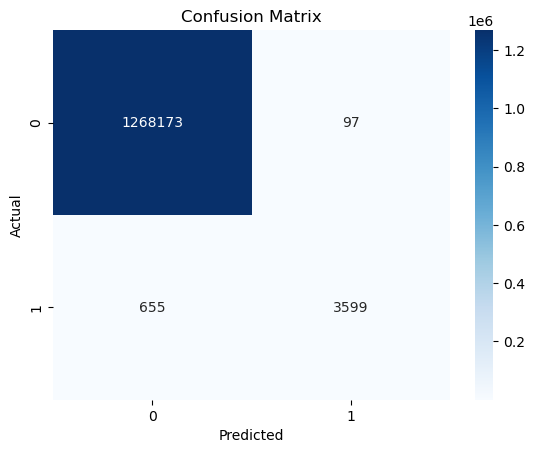

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

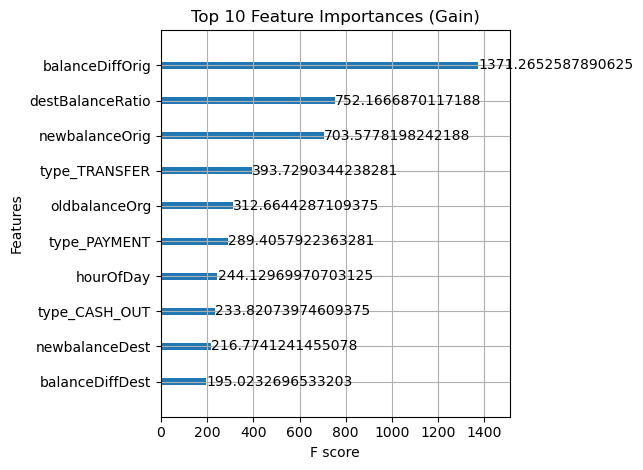

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (Gain)")
plt.tight_layout()
plt.show()

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
sample = X_test_df.sample(100, random_state=42)

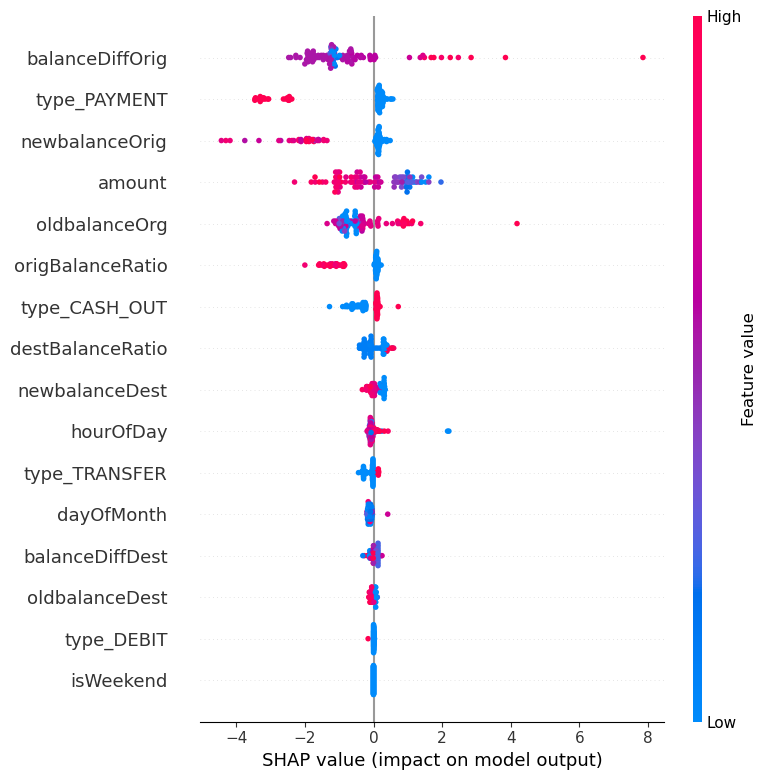

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)

# Get SHAP values
shap_values = explainer.shap_values(sample)

# Summary plot
shap.summary_plot(shap_values, sample)


In [ ]:
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
from app.preprocess import FeatureEngineer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Columns
numeric_features = [
    "hourOfDay", "dayOfMonth", "isWeekend", "amount", "oldbalanceOrg", "newbalanceOrig",
    "oldbalanceDest", "newbalanceDest",
    "balanceDiffOrig", "balanceDiffDest",
    "origBalanceRatio", "destBalanceRatio"
]
categorical_features = ["type"]

preprocessor = Pipeline([
    ("engineer", FeatureEngineer()),
    ("encode", ColumnTransformer([
        ("type", OneHotEncoder(handle_unknown="ignore"), ["type"])
    ], remainder="passthrough"))
])

model_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_model)
])

In [ ]:
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

In [ ]:
model_pipeline.fit(X, y)

: 

In [ ]:
joblib.dump(model_pipeline, '../model/fraud_model_pipeline_v2.1.pkl')

['../model/fraud_model_pipeline_v2.pkl']

In [6]:
print(df.shape)
print(df.dtypes)
print(df['isFraud'].value_counts(normalize=True))
print(df['isFlaggedFraud'].value_counts(normalize=True))

(6362620, 11)
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64
isFlaggedFraud
0    0.999997
1    0.000003
Name: proportion, dtype: float64


In [7]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


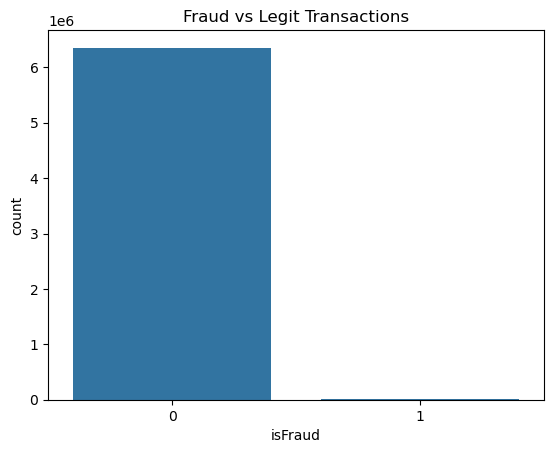

<Figure size 640x480 with 0 Axes>

In [8]:
sns.countplot(data=df, x='isFraud')
plt.title("Fraud vs Legit Transactions")
plt.show()
plt.savefig("../output/countplot.png", bbox_inches='tight', dpi=300)

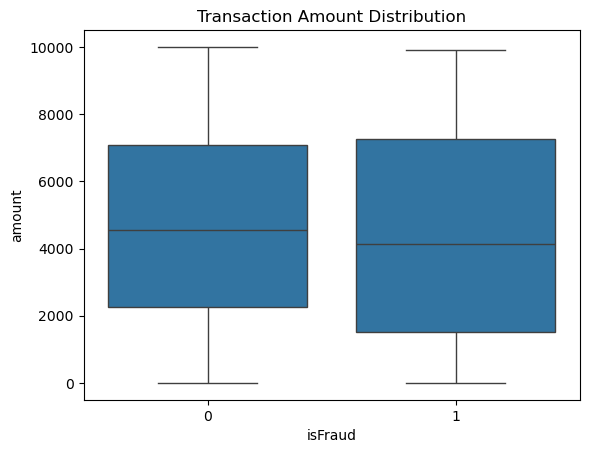

In [9]:
sns.boxplot(data=df[df['amount'] < 10000], x='isFraud', y='amount')
plt.title("Transaction Amount Distribution")
plt.show()

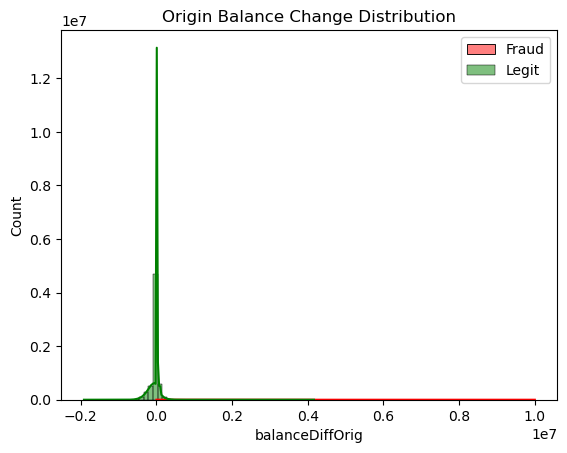

In [10]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

sns.histplot(df[df['isFraud'] == 1]['balanceDiffOrig'], bins=50, color='red', label='Fraud', kde=True)
sns.histplot(df[df['isFraud'] == 0]['balanceDiffOrig'], bins=50, color='green', label='Legit', kde=True)
plt.legend()
plt.title("Origin Balance Change Distribution")
plt.show()

In [6]:
df = df.drop(['nameOrig', 'nameDest', ], axis=1)

df = pd.get_dummies(df, columns=['type'], drop_first=True)

df['orig_balance_ratio'] = df['newbalanceOrig'] / (df['oldbalanceOrg'] + 1)
df['dest_balance_ratio'] = df['newbalanceDest'] / (df['oldbalanceDest'] + 1)


In [8]:
df = df.drop(['isFlaggedFraud', ], axis=1)

In [9]:
from collections import Counter

Counter(df['isFraud'])


Counter({0: 6354407, 1: 8213})

In [10]:
df.to_csv("../data/cleaned_transactions.csv", index=False)

: 